In [159]:
import pandas as pd
import numpy as np
import re
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
from imblearn.over_sampling import ADASYN, SMOTE
from scipy.stats import skew
from sklearn.preprocessing import power_transform

In [160]:
raw_data =  pd.read_csv("train.csv")
raw_data_test = pd.read_csv("test.csv")

In [161]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

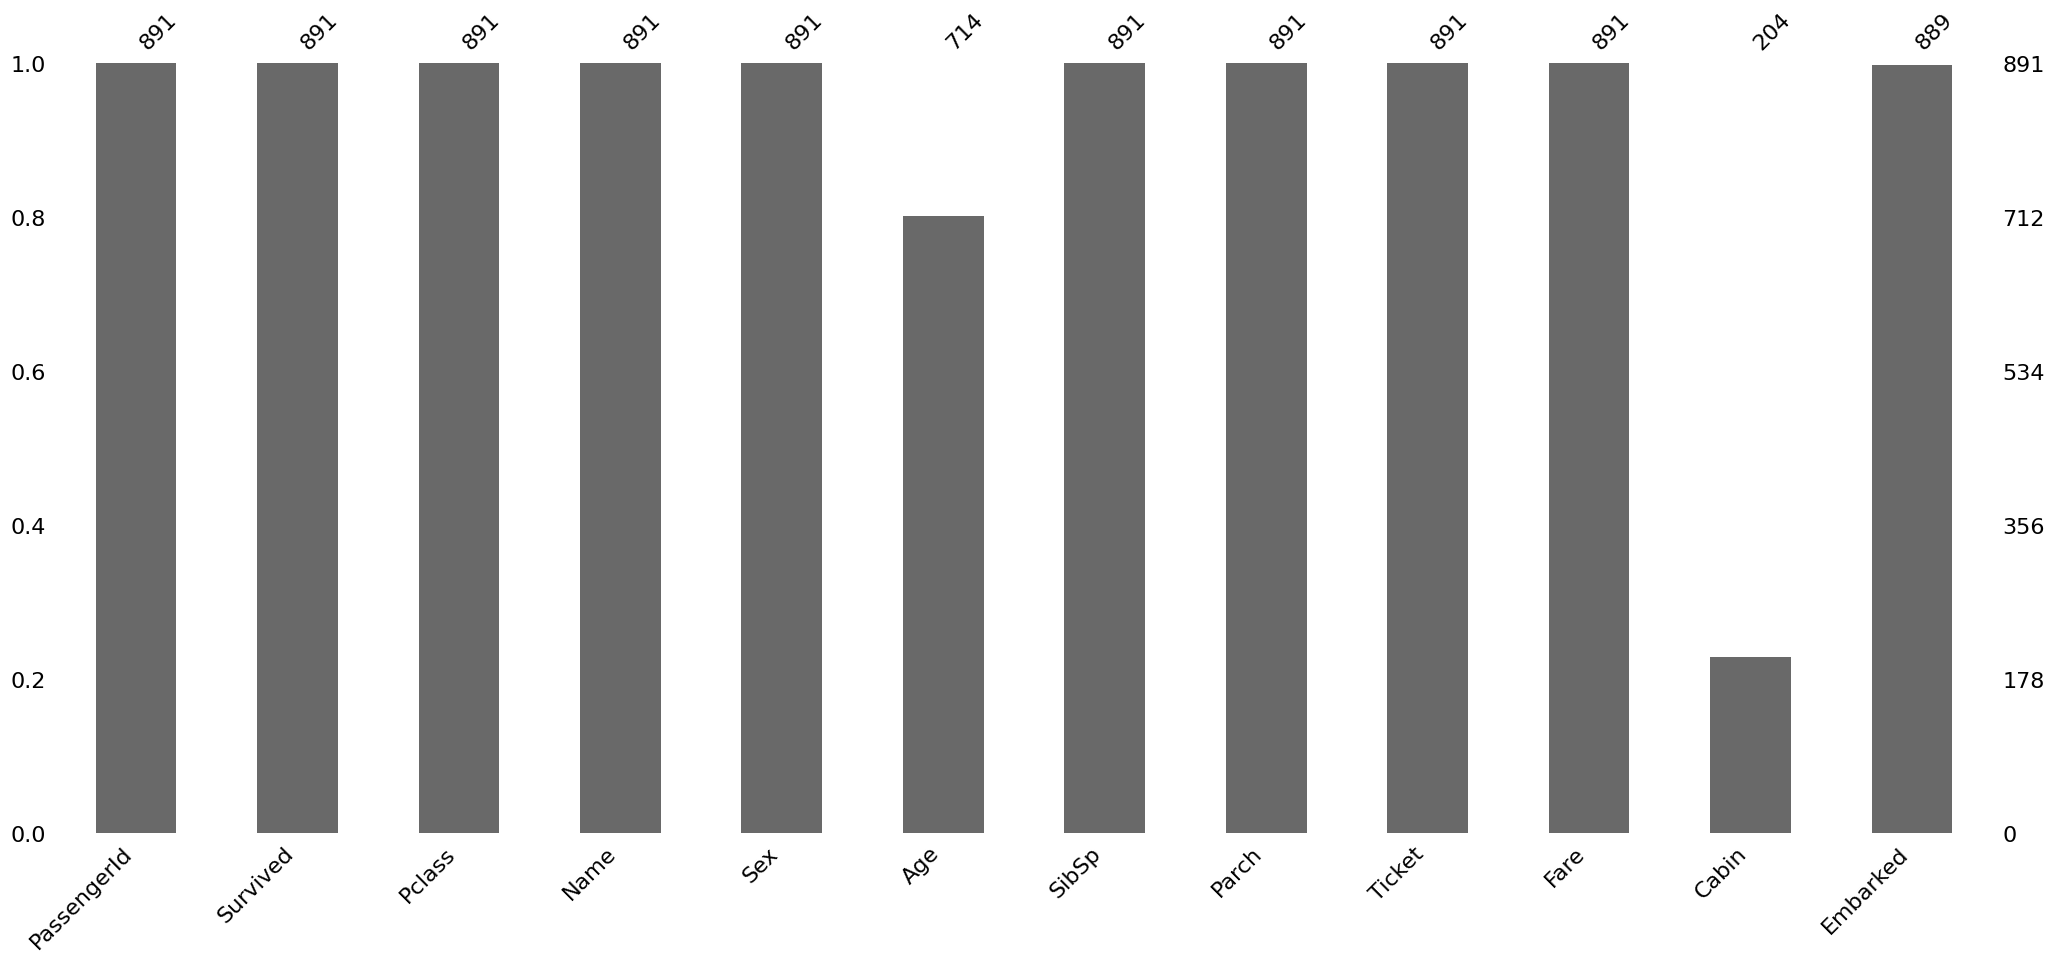

In [163]:
count_rows = len(raw_data)
msno.bar(raw_data.sample(count_rows))

In [164]:
df = raw_data.copy()
df_test = raw_data_test.copy()

In [165]:
# Funkcja do usuwania ostatnich cyfr ze stringu
def remove_last_numbers(s):
    processed = re.sub(r'\d+$', '', s).strip()
    return processed if processed else 'N'

# Usuń ostatnie cyfry z kolumny 'YourColumnName'
df['Ticket'] = df['Ticket'].apply(remove_last_numbers)
df_test['Ticket'] = df_test['Ticket'].apply(remove_last_numbers)


In [166]:
df.groupby(['Ticket']).count().reset_index()

,Ticket,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,A./5.,2,2,2,2,2,1,2,2,2,0,2
1,A.5.,2,2,2,2,2,2,2,2,2,0,2
2,A/4,3,3,3,3,3,3,3,3,3,0,3
3,A/4.,3,3,3,3,3,2,3,3,3,0,3
4,A/5,10,10,10,10,10,8,10,10,10,0,10
5,A/5.,7,7,7,7,7,7,7,7,7,0,7
6,A/S,1,1,1,1,1,0,1,1,1,0,1
7,A4.,1,1,1,1,1,0,1,1,1,0,1
8,C,5,5,5,5,5,5,5,5,5,0,5
9,C.A.,27,27,27,27,27,26,27,27,27,2,27


In [167]:
# Przygotowanie danych do FeatureHasher
data_to_hash_train = [[ticket] for ticket in df['Ticket']]
data_to_hash_test = [[ticket] for ticket in df_test['Ticket']]

hasher = FeatureHasher(n_features=5, input_type='string')

In [168]:
# Haszowanie i transformacja danych
X_hash = hasher.fit_transform(data_to_hash_train)
X_hash_test = hasher.transform(data_to_hash_test)

In [169]:
hashed_df = pd.DataFrame(X_hash.toarray())
hashed_df_test = pd.DataFrame(X_hash_test.toarray())

df = pd.concat([df, hashed_df], axis=1)
df_test = pd.concat([df_test, hashed_df_test], axis=1)


In [170]:
df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df_test.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [171]:
df.dropna(inplace=True)

<Axes: >

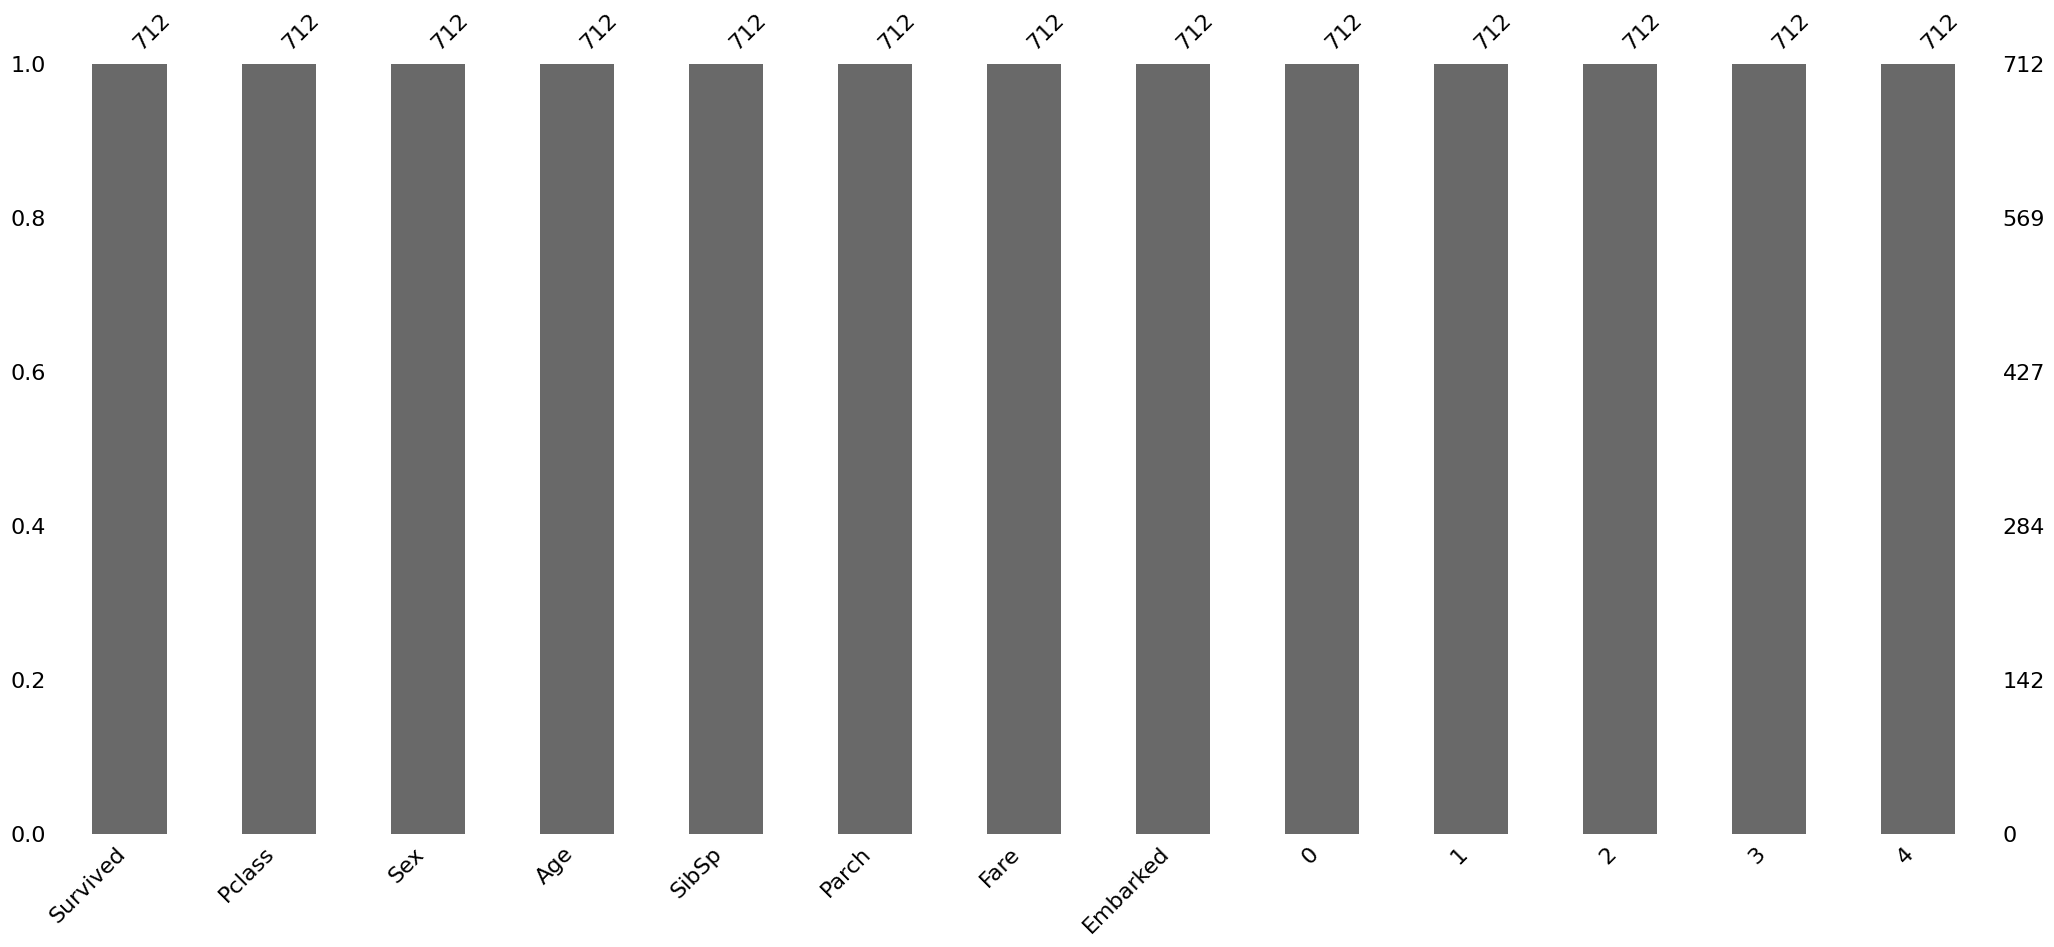

In [172]:
count_rows = len(df)
msno.bar(df.sample(count_rows))

In [173]:
# wyciaganie kolumn typu object
df_obj = df.select_dtypes(include=['object']).columns
df_obj

Index(['Sex', 'Embarked'], dtype='object')

In [174]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_encoded = df.copy()
df_encoded_test = df_test.copy()
df_to_encode = df_encoded[df_obj].astype(str)

for column in df_obj:
    df_encoded[column] = label_encoder.fit_transform(df_to_encode[column])
    df_encoded_test[column] = label_encoder.transform(df_encoded_test[column])
    
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,3,4
0,0,3,1,22.0,1,0,7.2500,2,0.0,0.0,0.0,0.0,-1.0
1,1,1,0,38.0,1,0,71.2833,0,0.0,-1.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,2,0.0,1.0,0.0,0.0,0.0
3,1,1,0,35.0,1,0,53.1000,2,0.0,0.0,-1.0,0.0,0.0
4,0,3,1,35.0,0,0,8.0500,2,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,0.0,0.0,-1.0,0.0,0.0
886,0,2,1,27.0,0,0,13.0000,2,0.0,0.0,-1.0,0.0,0.0
887,1,1,0,19.0,0,0,30.0000,2,0.0,0.0,-1.0,0.0,0.0
889,1,1,1,26.0,0,0,30.0000,0,0.0,0.0,-1.0,0.0,0.0


In [175]:
df_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int32  
 8   0            418 non-null    float64
 9   1            418 non-null    float64
 10  2            418 non-null    float64
 11  3            418 non-null    float64
 12  4            418 non-null    float64
dtypes: float64(7), int32(2), int64(4)
memory usage: 39.3 KB


<Figure size 2500x700 with 0 Axes>

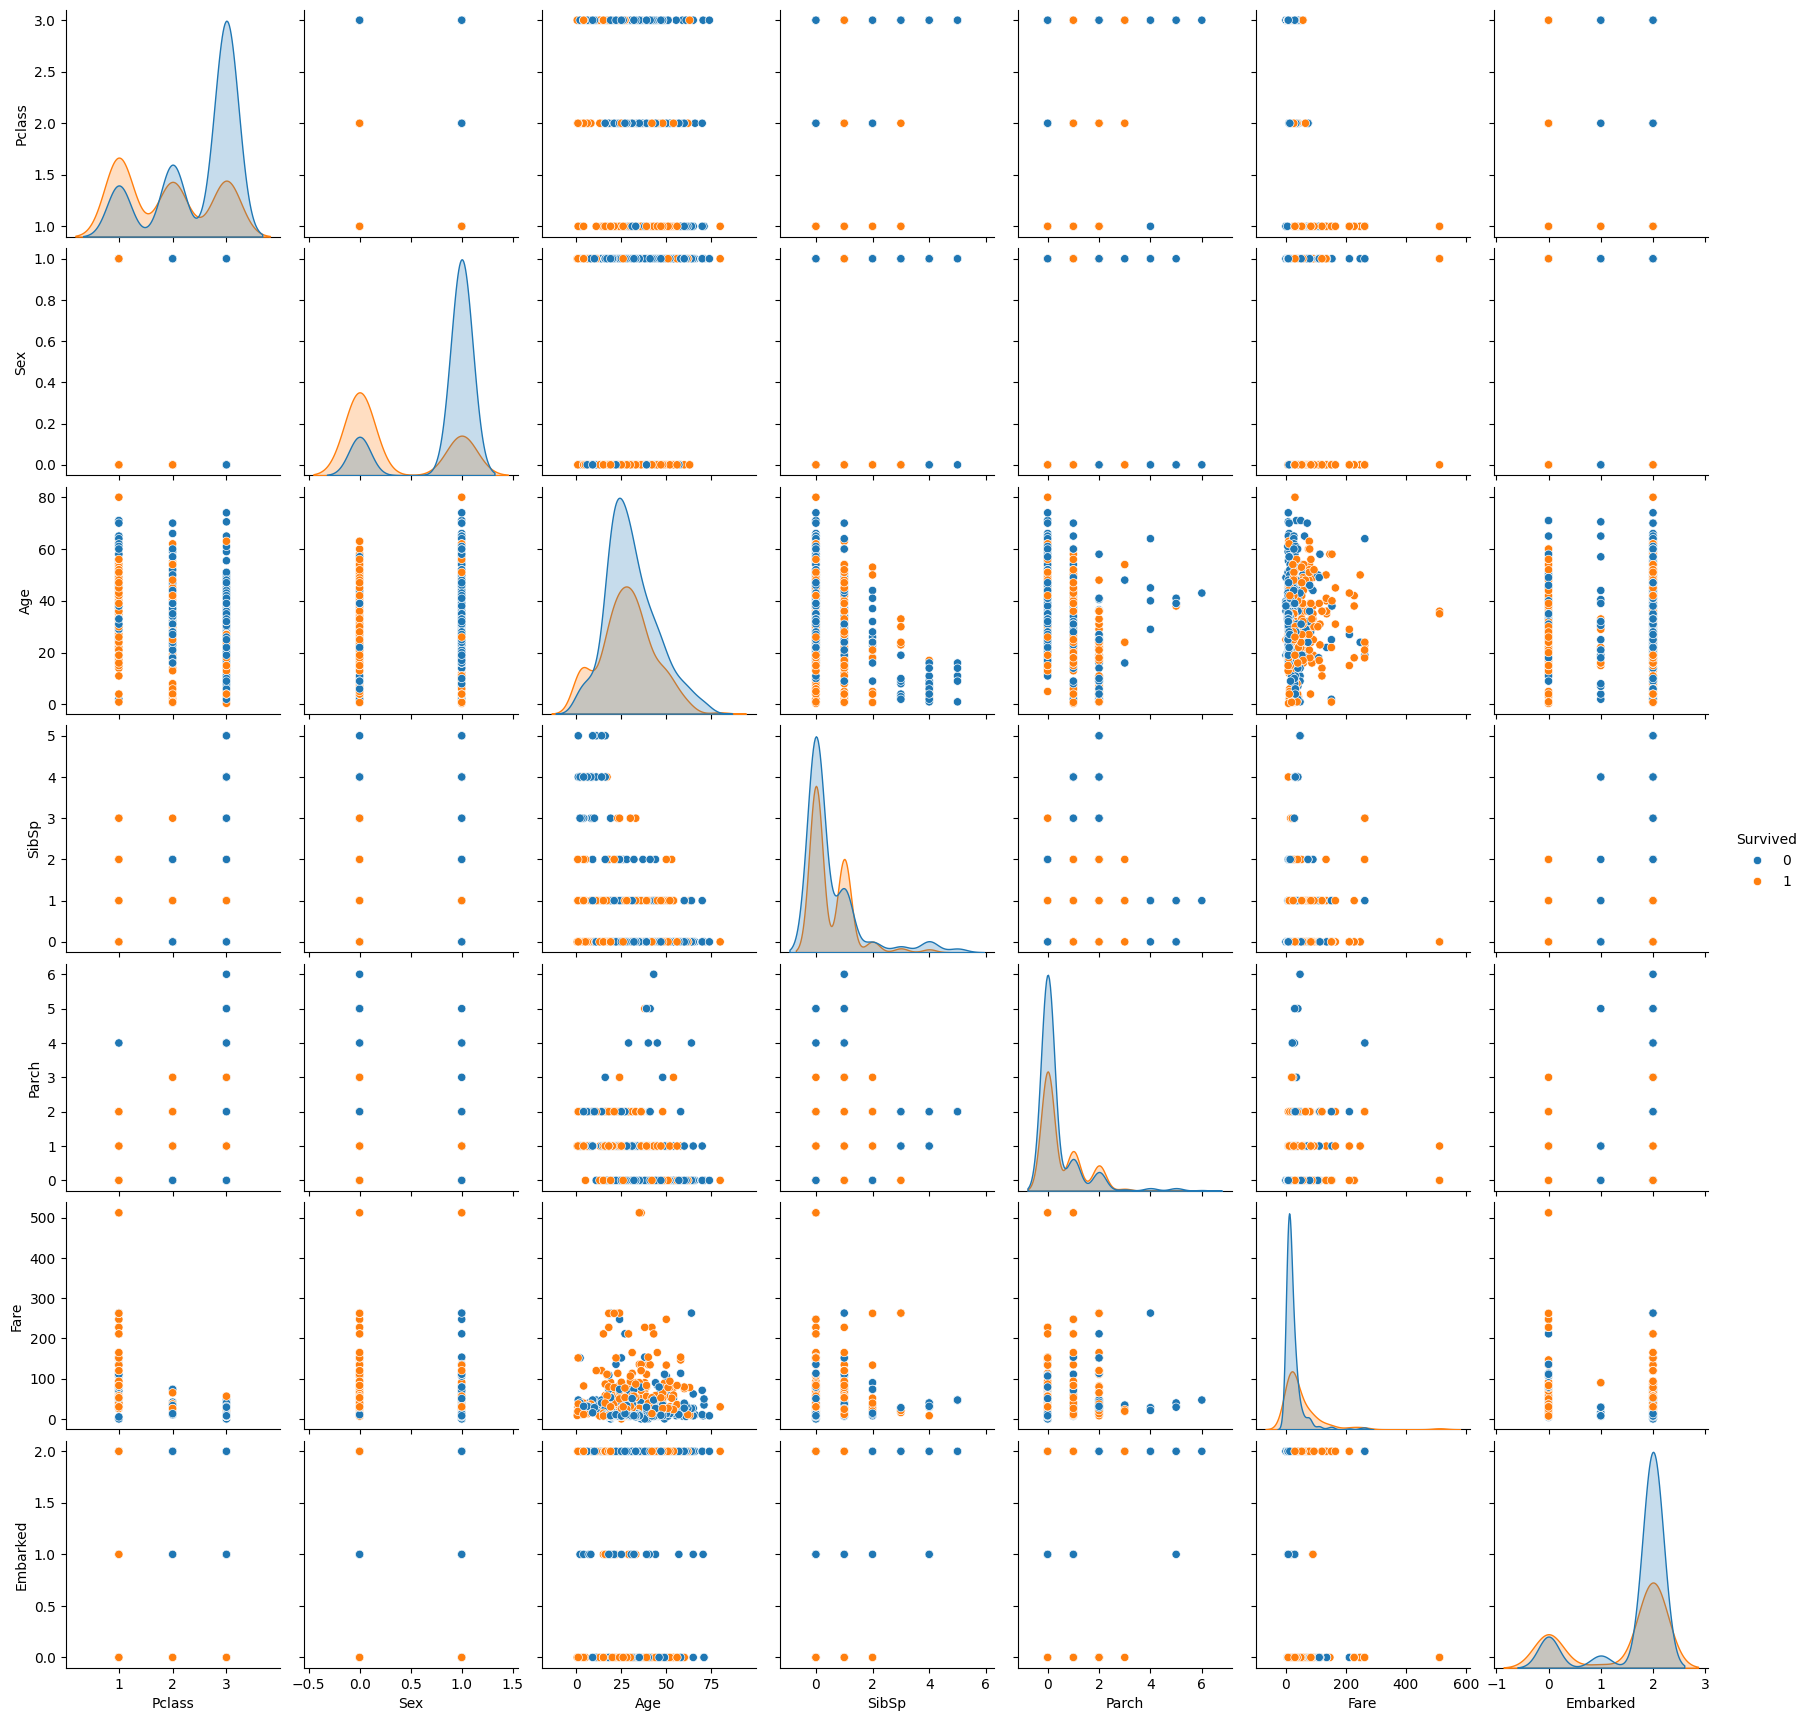

In [257]:
plt.figure(figsize=(25,7))
sns.pairplot(data=df_encoded, hue="Survived")

<Axes: >

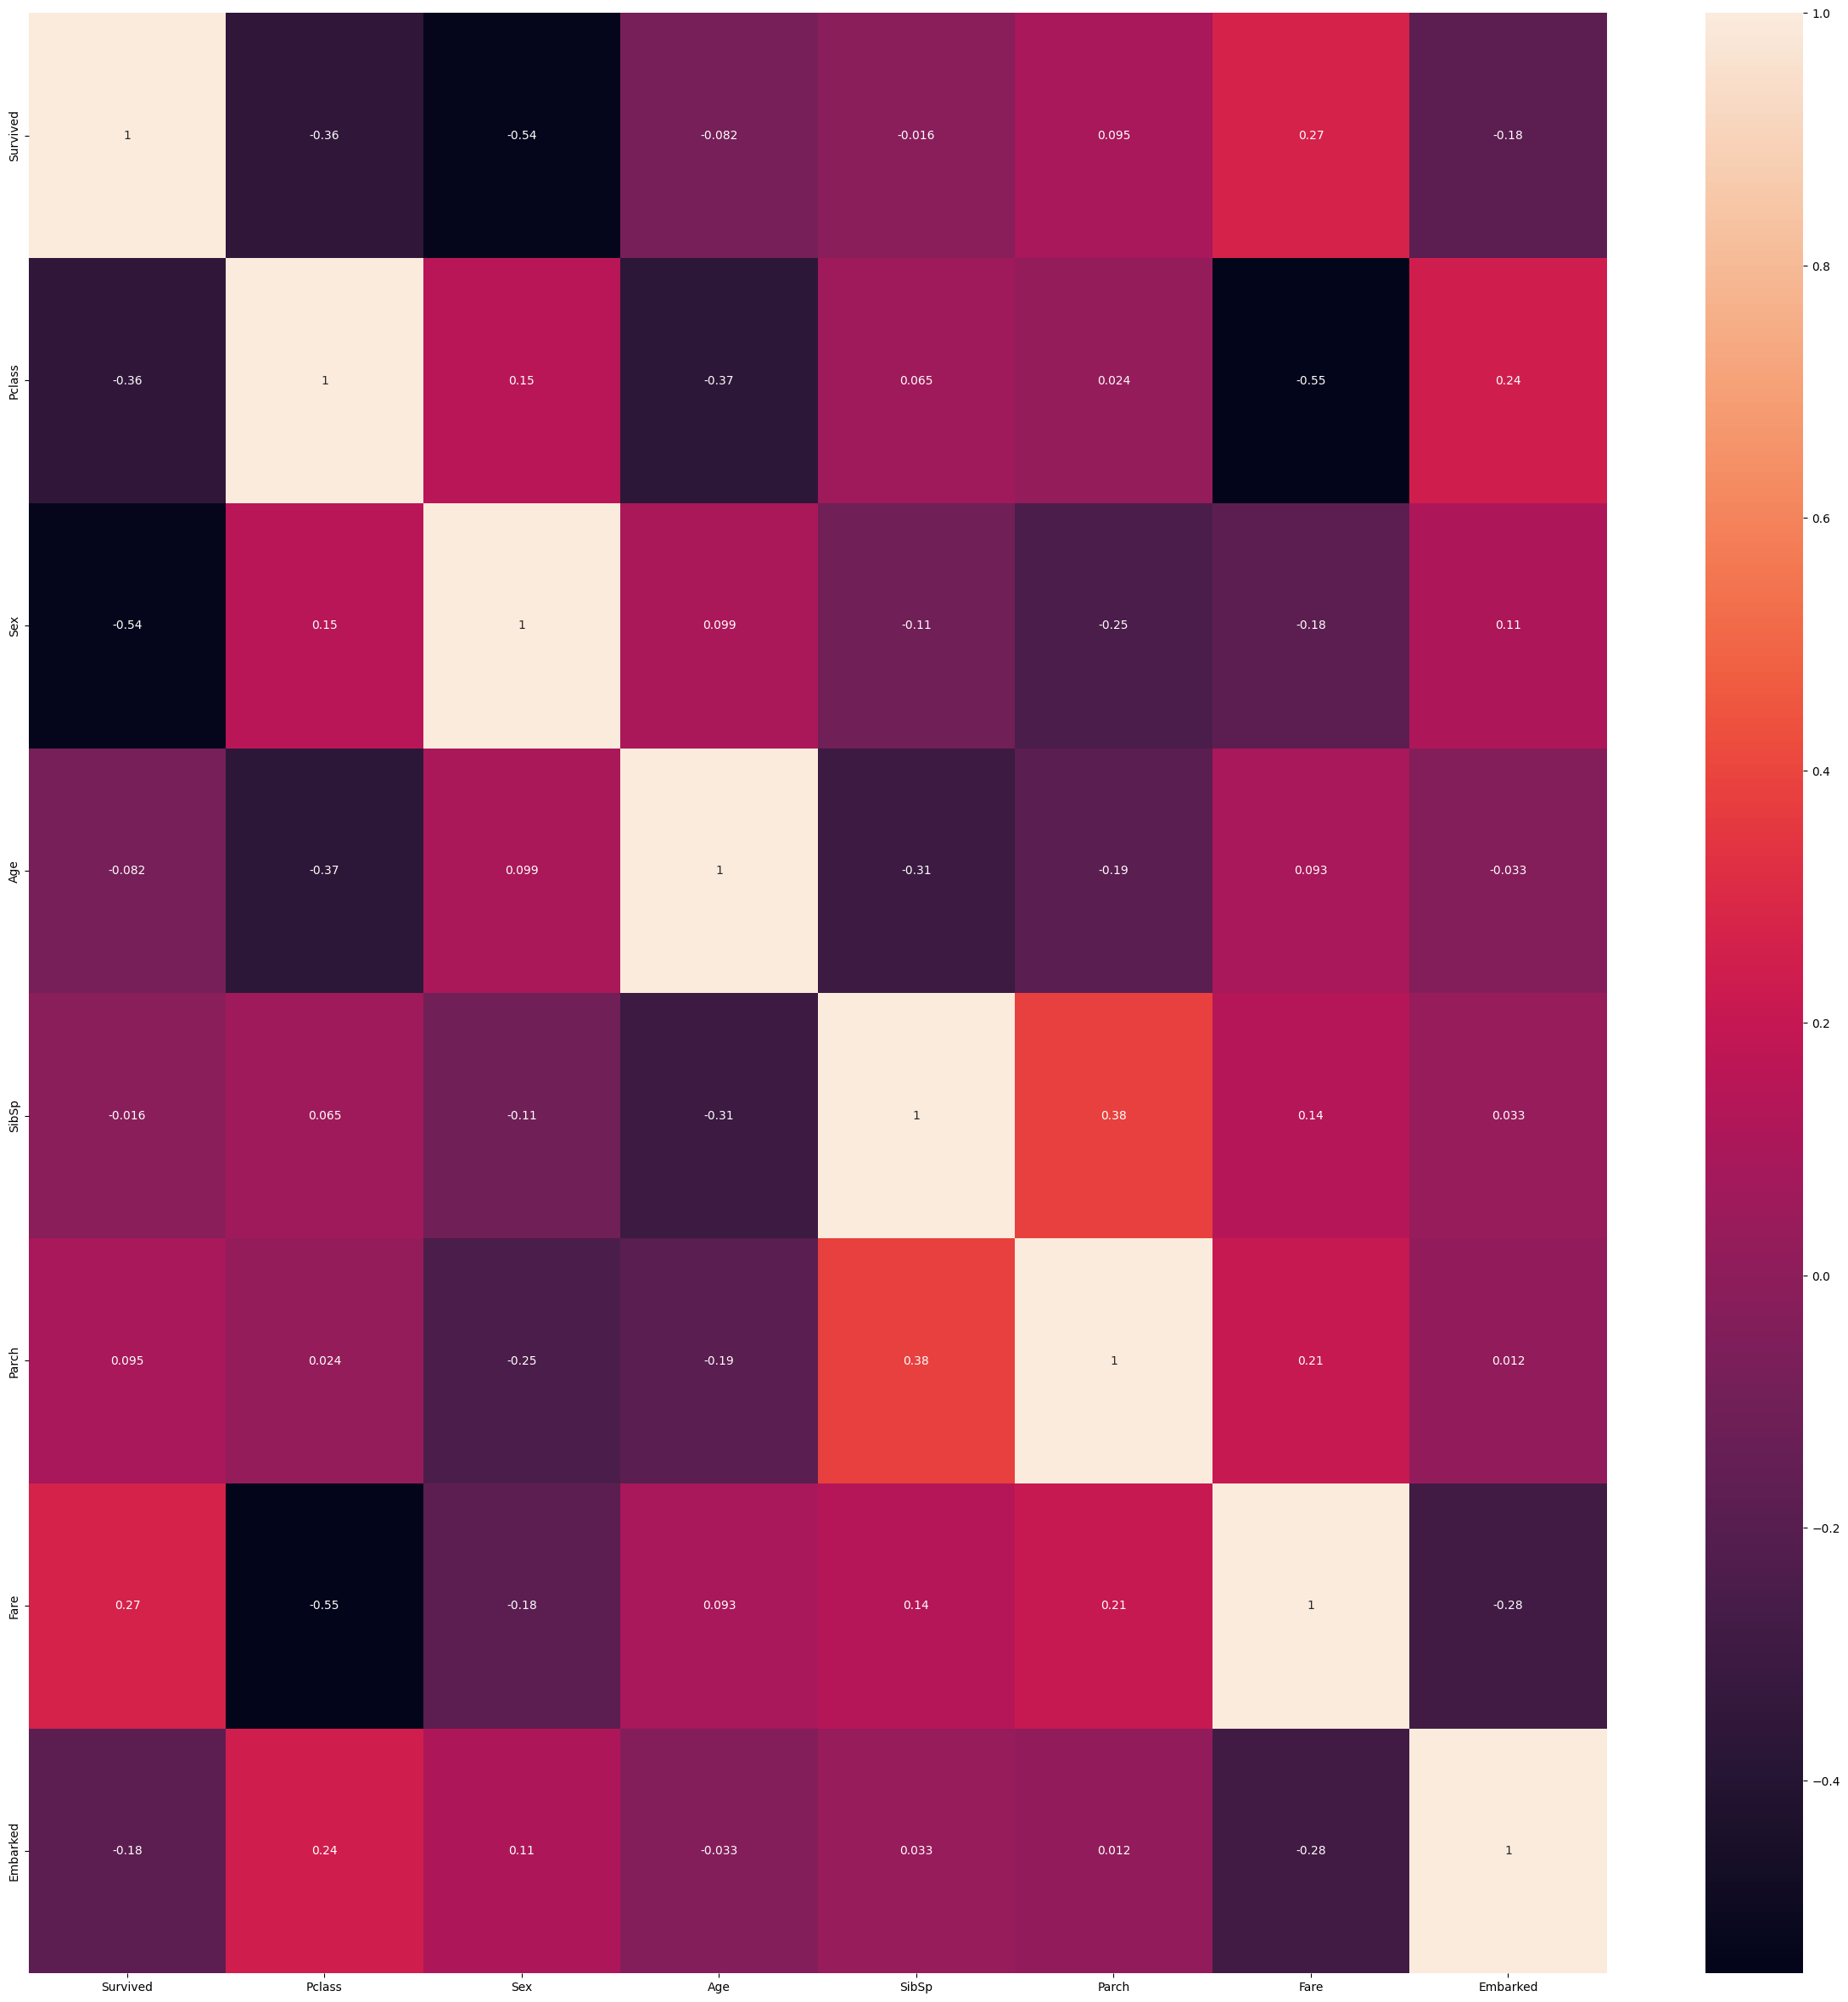

In [258]:
plt.figure(figsize = (30,30)) 
sns.heatmap(df_encoded.corr(),annot = True)

6 heavily skewed features.


Index(['Parch', 'Embarked', 'bin_1', 'bin_3', 'bin_4', 'bin_5'], dtype='object')

KeyError: "['bin_1', 'bin_3', 'bin_4', 'bin_5'] not in index"

In [177]:
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,3,4
0,0,3,1,22.0,1,0,7.2500,2,0.0,0.0,0.0,0.0,-1.0
1,1,1,0,38.0,1,0,71.2833,0,0.0,-1.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,2,0.0,1.0,0.0,0.0,0.0
3,1,1,0,35.0,1,0,53.1000,2,0.0,0.0,-1.0,0.0,0.0
4,0,3,1,35.0,0,0,8.0500,2,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,0.0,0.0,-1.0,0.0,0.0
886,0,2,1,27.0,0,0,13.0000,2,0.0,0.0,-1.0,0.0,0.0
887,1,1,0,19.0,0,0,30.0000,2,0.0,0.0,-1.0,0.0,0.0
889,1,1,1,26.0,0,0,30.0000,0,0.0,0.0,-1.0,0.0,0.0


In [178]:
X = df_encoded.drop(['Survived'], axis=1)
y = df_encoded['Survived']
X = X.astype(int)
y = y.astype(int)
X.columns = X.columns.astype(str)
df_test_enc_pred = df_encoded_test.drop(['PassengerId'], axis=1).copy()
df_test_enc_pred.columns = df_test_enc_pred.columns.astype(str)

In [179]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
"""# Utwórz instancję ADASYN
smote = SMOTE(random_state=42)"""

'# Utwórz instancję ADASYN\nsmote = SMOTE(random_state=42)'

In [181]:
"""# Dopasuj model SMOTE do danych i wygeneruj nowe dane
X_train, y_train = smote.fit_resample(X_train, y_train)"""

'# Dopasuj model SMOTE do danych i wygeneruj nowe dane\nX_train, y_train = smote.fit_resample(X_train, y_train)'

In [182]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test_enc_pred = scaler.transform(df_test_enc_pred)

In [183]:
X_train = pd.DataFrame(X_train, columns=df_encoded.drop(['Survived'], axis=1).columns)
X_train.columns = X_train.columns.astype(str)

y_train = pd.DataFrame(y_train, columns=['Survived'])

X_test = pd.DataFrame(X_test, columns=df_encoded.drop(['Survived'], axis=1).columns)
X_test.columns = X_test.columns = X_train.columns.astype(str)

df_test_enc_pred = pd.DataFrame(df_test_enc_pred, columns=df_encoded_test.drop(['PassengerId'], axis=1).columns)
df_test_enc_pred.columns = df_test_enc_pred.columns.astype(str)

In [184]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import numpy as np

# Definicja listy modeli
models = [
    RandomForestClassifier(random_state=42, n_jobs=10),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(n_jobs=10),
    MLPClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, tree_method='gpu_hist', n_jobs=10),
    LGBMClassifier(random_state=42, device='gpu', gpu_platform_id=0, gpu_device_id=0, n_jobs=10),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42, n_jobs=10)
]

# Podział danych na zestawy treningowe i testowe

X_train_full = X_train
y_train_full = y_train

# Krzyżowa walidacja: podział na zestawy treningowe i walidacyjne
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for model in tqdm(models):
    model_name = model.__class__.__name__
    train_auroc_list = []
    val_auroc_list = []
    test_auroc_list = []
    
    for train_index, val_index in kf.split(X_train_full):
        X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
        y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

        # Trenowanie modelu
        model.fit(X_train, y_train.values.ravel())

        # Obliczanie AUROC dla zbioru treningowego
        if hasattr(model, "predict_proba"):
            y_train_pred = model.predict_proba(X_train)[:, 1]
        else:
            y_train_pred = model.decision_function(X_train)
        train_auroc = roc_auc_score(y_train, y_train_pred)
        train_auroc_list.append(train_auroc)

        # Obliczanie AUROC dla zbioru walidacyjnego
        if hasattr(model, "predict_proba"):
            y_val_pred = model.predict_proba(X_val)[:, 1]
        else:
            y_val_pred = model.decision_function(X_val)
        val_auroc = roc_auc_score(y_val, y_val_pred)
        val_auroc_list.append(val_auroc)

        # Obliczanie AUROC dla zbioru testowego
        if hasattr(model, "predict_proba"):
            y_test_pred = model.predict_proba(X_test)[:, 1]
        else:
            y_test_pred = model.decision_function(X_test)
        test_auroc = roc_auc_score(y_test, y_test_pred)
        test_auroc_list.append(test_auroc)
        
        # Aktualizacja paska postępu tqdm
        tqdm.write(f"{model_name}: Train AUROC = {train_auroc:.4f}, Validation AUROC = {val_auroc:.4f}, Test AUROC = {test_auroc:.4f}")

    results[model_name] = {
        'avg_train_auroc': np.mean(train_auroc_list),
        'avg_val_auroc': np.mean(val_auroc_list),
        'avg_test_auroc': np.mean(test_auroc_list)
    }

# Wyświetlenie wyników AUROC dla każdego modelu
for model_name, scores in results.items():
    print(f"{model_name}: Avg Train AUROC = {scores['avg_train_auroc']:.4f}, Avg Validation AUROC = {scores['avg_val_auroc']:.4f}, Avg Test AUROC = {scores['avg_test_auroc']:.4f}")


RandomForestClassifier: Train AUROC = 0.9981, Validation AUROC = 0.9120, Test AUROC = 0.8482


  0%|          | 0/12 [00:00<?, ?it/s]

RandomForestClassifier: Train AUROC = 0.9987, Validation AUROC = 0.8536, Test AUROC = 0.8425


  0%|          | 0/12 [00:00<?, ?it/s]

RandomForestClassifier: Train AUROC = 0.9981, Validation AUROC = 0.7903, Test AUROC = 0.8147
RandomForestClassifier: Train AUROC = 0.9985, Validation AUROC = 0.8634, Test AUROC = 0.8460


  8%|▊         | 1/12 [00:01<00:10,  1.02it/s]

RandomForestClassifier: Train AUROC = 0.9985, Validation AUROC = 0.8477, Test AUROC = 0.8400
GradientBoostingClassifier: Train AUROC = 0.9616, Validation AUROC = 0.9152, Test AUROC = 0.8411


  8%|▊         | 1/12 [00:01<00:10,  1.02it/s]

GradientBoostingClassifier: Train AUROC = 0.9651, Validation AUROC = 0.8671, Test AUROC = 0.8177
GradientBoostingClassifier: Train AUROC = 0.9724, Validation AUROC = 0.7938, Test AUROC = 0.8118


 17%|█▋        | 2/12 [00:01<00:07,  1.38it/s]

GradientBoostingClassifier: Train AUROC = 0.9603, Validation AUROC = 0.8849, Test AUROC = 0.8430
GradientBoostingClassifier: Train AUROC = 0.9669, Validation AUROC = 0.8462, Test AUROC = 0.8240
GaussianNB: Train AUROC = 0.8253, Validation AUROC = 0.8125, Test AUROC = 0.8073
GaussianNB: Train AUROC = 0.8252, Validation AUROC = 0.8288, Test AUROC = 0.8010
GaussianNB: Train AUROC = 0.8368, Validation AUROC = 0.7399, Test AUROC = 0.7889
GaussianNB: Train AUROC = 0.8095, Validation AUROC = 0.7997, Test AUROC = 0.7875
GaussianNB: Train AUROC = 0.8244, Validation AUROC = 0.8446, Test AUROC = 0.7986


 17%|█▋        | 2/12 [00:01<00:07,  1.38it/s]

KNeighborsClassifier: Train AUROC = 0.9092, Validation AUROC = 0.8706, Test AUROC = 0.8237
KNeighborsClassifier: Train AUROC = 0.9126, Validation AUROC = 0.8001, Test AUROC = 0.8439
KNeighborsClassifier: Train AUROC = 0.9218, Validation AUROC = 0.7941, Test AUROC = 0.8320
KNeighborsClassifier: Train AUROC = 0.9219, Validation AUROC = 0.7972, Test AUROC = 0.8397


 33%|███▎      | 4/12 [00:01<00:03,  2.64it/s]

KNeighborsClassifier: Train AUROC = 0.9226, Validation AUROC = 0.8441, Test AUROC = 0.8469


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 4/12 [00:02<00:03,  2.64it/s]

MLPClassifier: Train AUROC = 0.9110, Validation AUROC = 0.9142, Test AUROC = 0.8302


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 4/12 [00:02<00:03,  2.64it/s]

MLPClassifier: Train AUROC = 0.9256, Validation AUROC = 0.8439, Test AUROC = 0.8450


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 4/12 [00:02<00:03,  2.64it/s]

MLPClassifier: Train AUROC = 0.9284, Validation AUROC = 0.8016, Test AUROC = 0.8169


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 4/12 [00:03<00:03,  2.64it/s]

MLPClassifier: Train AUROC = 0.9207, Validation AUROC = 0.8772, Test AUROC = 0.8421


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 42%|████▏     | 5/12 [00:03<00:05,  1.32it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


MLPClassifier: Train AUROC = 0.9208, Validation AUROC = 0.8472, Test AUROC = 0.8208


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
 42%|████▏     | 5/12 [00:04<00:05,  1.32it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier: Train AUROC = 0.9961, Validation AUROC = 0.9017, Test AUROC = 0.8122


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
 42%|████▏     | 5/12 [00:04<00:05,  1.32it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier: Train AUROC = 0.9960, Validation AUROC = 0.8425, Test AUROC = 0.8218


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
 42%|████▏     | 5/12 [00:05<00:05,  1.32it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier: Train AUROC = 0.9956, Validation AUROC = 0.7979, Test AUROC = 0.7770


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
 42%|████▏     | 5/12 [00:05<00:05,  1.32it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier: Train AUROC = 0.9969, Validation AUROC = 0.8509, Test AUROC = 0.8244


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
 50%|█████     | 6/12 [00:06<00:07,  1.30s/it]

XGBClassifier: Train AUROC = 0.9970, Validation AUROC = 0.8491, Test AUROC = 0.8097
[LightGBM] [Info] Number of positive: 185, number of negative: 270
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 9
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000476 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406593 -> initscore=-0.378066
[LightGBM] [Info] Start training from score -0.378066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

 50%|█████     | 6/12 [00:06<00:07,  1.30s/it]

LGBMClassifier: Train AUROC = 0.9809, Validation AUROC = 0.9098, Test AUROC = 0.8329
[LightGBM] [Info] Number of positive: 178, number of negative: 277
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 9
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000609 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391209 -> initscore=-0.442234
[LightGBM] [Info] Start training from score -0.442234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

 50%|█████     | 6/12 [00:06<00:07,  1.30s/it]

LGBMClassifier: Train AUROC = 0.9837, Validation AUROC = 0.8631, Test AUROC = 0.8341
[LightGBM] [Info] Number of positive: 183, number of negative: 272
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 9
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000509 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402198 -> initscore=-0.396316
[LightGBM] [Info] Start training from score -0.396316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

 50%|█████     | 6/12 [00:07<00:07,  1.30s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBMClassifier: Train AUROC = 0.9883, Validation AUROC = 0.8006, Test AUROC = 0.7998
[LightGBM] [Info] Number of positive: 176, number of negative: 279
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 10
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000562 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.386813 -> initscore=-0.460728
[LightGBM] [Info] Start training

 50%|█████     | 6/12 [00:07<00:07,  1.30s/it]

LGBMClassifier: Train AUROC = 0.9848, Validation AUROC = 0.8889, Test AUROC = 0.8349
[LightGBM] [Info] Number of positive: 178, number of negative: 278
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 456, number of used features: 10
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.00 MB) transferred to GPU in 0.000464 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390351 -> initscore=-0.445838
[LightGBM] [Info] Start training from score -0.445838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

 58%|█████▊    | 7/12 [00:08<00:07,  1.55s/it]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
                                              

LGBMClassifier: Train AUROC = 0.9858, Validation AUROC = 0.8507, Test AUROC = 0.8101
LinearDiscriminantAnalysis: Train AUROC = 0.8586, Validation AUROC = 0.8892, Test AUROC = 0.8194
LinearDiscriminantAnalysis: Train AUROC = 0.8730, Validation AUROC = 0.8231, Test AUROC = 0.8181
LinearDiscriminantAnalysis: Train AUROC = 0.8757, Validation AUROC = 0.8185, Test AUROC = 0.8284
LinearDiscriminantAnalysis: Train AUROC = 0.8610, Validation AUROC = 0.8829, Test AUROC = 0.8218
LinearDiscriminantAnalysis: Train AUROC = 0.8701, Validation AUROC = 0.8478, Test AUROC = 0.8222
QuadraticDiscriminantAnalysis: Train AUROC = 0.8447, Validation AUROC = 0.8483, Test AUROC = 0.8333
QuadraticDiscriminantAnalysis: Train AUROC = 0.8543, Validation AUROC = 0.8393, Test AUROC = 0.8401
QuadraticDiscriminantAnalysis: Train AUROC = 0.7276, Validation AUROC = 0.6452, Test AUROC = 0.6817
QuadraticDiscriminantAnalysis: Train AUROC = 0.8373, Validation AUROC = 0.8163, Test AUROC = 0.8214
QuadraticDiscriminantAnalysis:

 75%|███████▌  | 9/12 [00:08<00:02,  1.16it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
 75%|███████▌  | 9/12 [00:08<00:02,  1.16it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier: Train AUROC = 0.9994, Validation AUROC = 0.7004, Test AUROC = 0.6767
DecisionTreeClassifier: Train AUROC = 0.9987, Validation AUROC = 0.7788, Test AUROC = 0.7939
DecisionTreeClassifier: Train AUROC = 0.9993, Validation AUROC = 0.7961, Test AUROC = 0.7358
AdaBoostClassifier: Train AUROC = 0.9037, Validation AUROC = 0.8743, Test AUROC = 0.8052


 75%|███████▌  | 9/12 [00:08<00:02,  1.16it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
 75%|███████▌  | 9/12 [00:08<00:02,  1.16it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
                                              

AdaBoostClassifier: Train AUROC = 0.9227, Validation AUROC = 0.8239, Test AUROC = 0.8220
AdaBoostClassifier: Train AUROC = 0.9249, Validation AUROC = 0.7424, Test AUROC = 0.7819


 75%|███████▌  | 9/12 [00:08<00:02,  1.16it/s]C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
 92%|█████████▏| 11/12 [00:08<00:00,  1.60it/s]

AdaBoostClassifier: Train AUROC = 0.9146, Validation AUROC = 0.8818, Test AUROC = 0.8358
AdaBoostClassifier: Train AUROC = 0.9252, Validation AUROC = 0.8035, Test AUROC = 0.8059
BaggingClassifier: Train AUROC = 0.9952, Validation AUROC = 0.8777, Test AUROC = 0.7926


 92%|█████████▏| 11/12 [00:09<00:00,  1.60it/s]

BaggingClassifier: Train AUROC = 0.9946, Validation AUROC = 0.8253, Test AUROC = 0.8064
BaggingClassifier: Train AUROC = 0.9943, Validation AUROC = 0.7801, Test AUROC = 0.7786
BaggingClassifier: Train AUROC = 0.9957, Validation AUROC = 0.8504, Test AUROC = 0.8233


100%|██████████| 12/12 [00:10<00:00,  1.15it/s]

BaggingClassifier: Train AUROC = 0.9961, Validation AUROC = 0.8469, Test AUROC = 0.8209
RandomForestClassifier: Avg Train AUROC = 0.9984, Avg Validation AUROC = 0.8534, Avg Test AUROC = 0.8383
GradientBoostingClassifier: Avg Train AUROC = 0.9653, Avg Validation AUROC = 0.8615, Avg Test AUROC = 0.8275
GaussianNB: Avg Train AUROC = 0.8242, Avg Validation AUROC = 0.8051, Avg Test AUROC = 0.7967
KNeighborsClassifier: Avg Train AUROC = 0.9176, Avg Validation AUROC = 0.8212, Avg Test AUROC = 0.8373
MLPClassifier: Avg Train AUROC = 0.9213, Avg Validation AUROC = 0.8568, Avg Test AUROC = 0.8310
XGBClassifier: Avg Train AUROC = 0.9963, Avg Validation AUROC = 0.8484, Avg Test AUROC = 0.8090
LGBMClassifier: Avg Train AUROC = 0.9847, Avg Validation AUROC = 0.8626, Avg Test AUROC = 0.8224
LinearDiscriminantAnalysis: Avg Train AUROC = 0.8677, Avg Validation AUROC = 0.8523, Avg Test AUROC = 0.8220
QuadraticDiscriminantAnalysis: Avg Train AUROC = 0.8220, Avg Validation AUROC = 0.8002, Avg Test AUROC =

In [185]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

# Definicja parametrów do optymalizacji dla RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

total_iterations = 100  # Zmniejszenie liczby iteracji

best_params = None
best_auc = 0.0

# Funkcja do oceny modelu za pomocą RandomizedSearchCV
def evaluate_model():
    rf_model = RandomForestClassifier(random_state=42)
    cv = 5  # liczba podziałów w walidacji krzyżowej

    # Przeszukiwanie losowe z krzyżową walidacją
    random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=total_iterations, scoring='roc_auc', cv=cv, verbose=1, random_state=42)
    
    # Rozpoczęcie przeszukiwania
    global pbar
    with tqdm(total=total_iterations, desc="Hyperparameter tuning") as pbar:
        random_search.fit(X_train, y_train.values.ravel())

    # Wybierz najlepsze parametry
    best_params = random_search.best_params_

    # Przewidywanie na zbiorze testowym i obliczenie AUROC
    y_pred_proba_test = random_search.predict_proba(X_test)[:, 1]
    test_auroc = roc_auc_score(y_test, y_pred_proba_test)

    # Wyświetlanie informacji
    print(f"Wynik AUROC na danych testowych: {test_auroc}")
    print("Najlepsze parametry:", best_params)
    print("Najlepszy wynik AUROC (CV):", random_search.best_score_)

    return best_params, test_auroc

# Wywołanie funkcji do oceny modelu
best_params, test_auroc = evaluate_model()

print("Najlepsze parametry:", best_params)
print(f"Wynik AUROC na danych testowych: {test_auroc}")


Hyperparameter tuning:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Hyperparameter tuning:   0%|          | 0/100 [00:11<?, ?it/s]


KeyboardInterrupt: 

In [186]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

# Definicja najlepszych parametrów
best_params = {
    'n_estimators': 300,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': None,
    'bootstrap': False,
    'random_state': 42
}

# Inicjalizacja modelu z najlepszymi parametrami
rf_model = RandomForestClassifier(**best_params)

# Kroswalidacja
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

# Wyświetlenie wyników kroswalidacji
print(f"Średni wynik AUROC z kroswalidacji: {cv_scores.mean()}")
print(f"Wyniki AUROC z poszczególnych foldów: {cv_scores}")

# Trenowanie modelu na całym zbiorze treningowym
rf_model.fit(X_train, y_train.values.ravel())

# Przewidywanie na zbiorze testowym
y_pred_proba_test = rf_model.predict_proba(X_test)[:, 1]

# Obliczenie wyniku AUROC na zbiorze testowym
test_auroc = roc_auc_score(y_test, y_pred_proba_test)

# Wyświetlenie wyniku na danych testowych
print(f"Wynik AUROC na danych testowych: {test_auroc}")


C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Centrum\anaconda3_nowa\envs\fc\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

Średni wynik AUROC z kroswalidacji: 0.8604558338486911
Wyniki AUROC z poszczególnych foldów: [0.77827381 0.84267677 0.92979798 0.87755102 0.87397959]
Wynik AUROC na danych testowych: 0.8444444444444444


In [281]:
df_encoded_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [329]:
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,3,4
0,0,3,1,22.0,1,0,7.2500,2,0.0,0.0,0.0,0.0,-1.0
1,1,1,0,38.0,1,0,71.2833,0,0.0,-1.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,2,0.0,1.0,0.0,0.0,0.0
3,1,1,0,35.0,1,0,53.1000,2,0.0,0.0,-1.0,0.0,0.0
4,0,3,1,35.0,0,0,8.0500,2,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,0.0,0.0,-1.0,0.0,0.0
886,0,2,1,27.0,0,0,13.0000,2,0.0,0.0,-1.0,0.0,0.0
887,1,1,0,19.0,0,0,30.0000,2,0.0,0.0,-1.0,0.0,0.0
889,1,1,1,26.0,0,0,30.0000,0,0.0,0.0,-1.0,0.0,0.0


In [330]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df_test_enc_pred.columns = df_test_enc_pred.columns.astype(str)

# Zachowaj PassengerId
passenger_ids = df_encoded_test['PassengerId']


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [284]:

# Przewidywanie na nowych danych testowych
y_pred_proba = rf_model.predict_proba(df_test_enc_pred)[:, 1]

# Konwersja przewidywań do wartości binarnych (0 lub 1) z progiem 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Zapisz przewidywane wyniki do pliku z PassengerId i Survived
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_pred})
output.to_csv('predictions.csv', index=False)

print("Przewidywania zapisane do pliku predictions.csv")


Przewidywania zapisane do pliku predictions.csv
